[[1.25459e-02]
 [-2.55146e-02]
 [-8.51536e-03]
 [-3.82876e-02]
 [-7.01709e-02]]


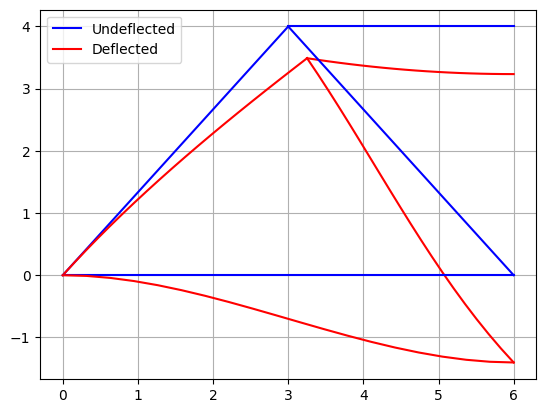

In [25]:
from FEA.FEA import *

asm1 = np.array([
    [1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 0], 
])

asm2 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1], 
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0], 
])

asm3 = np.array([
    [1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
])

asm4 = np.array([
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
])

E = 200e9
I = 6e-6
A = 2e-4
L1 = 3
L2 = 5
L3 = 5
L4 = 6
angle1 = 0
angle2 = 53.1
angle3 = -36.9
angle4 = 0

elements = [
    Element(asm1, E, I, L1, A, angle1),
    Element(asm2, E, I, L2, A, angle2),
    Element(asm3, E, I, L3, A, angle3),
    Element(asm4, E, I, L4, A, angle4, UDL=(0, -29e3, 1, 1)),
]

Q = np.zeros((5,1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[3].UDL_f_shear)
# print(structure.external_force_vector)
# print(structure.q)

# print(structure.elements[1].global_force + structure.elements[3].global_force - structure.elements[3].UDL_F_shear)

# print(structure.elements[0].local_force)
# print(structure.elements[0].global_force)

# print(structure.elements[2].global_force + structure.elements[3].global_force - structure.elements[3].UDL_F_shear)

# print(structure.elements[1].local_force)

print(structure.q)

nodes = np.array([
    [[3, 4], [6, 4]],
    [[0, 0], [3, 4]],
    [[3, 4], [6, 0]],
    [[0, 0], [6, 0]]
])

displ_mag = 20
res = 20

structure.plot_structure(nodes, displ_mag, res)

Problem 2

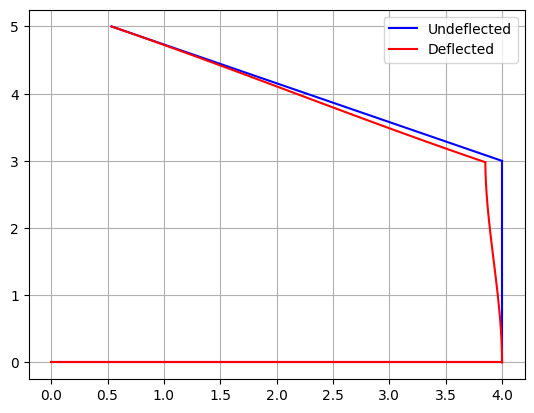

In [47]:
from FEA.FEA import *

asm1 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1], 
])

asm2 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1], 
])

asm3 = np.array([
    [0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0], 
])

E = 200e9
I = 1e-4
A = 2e-4
L1 = 4
L2 = 3
L3 = 4
angle1 = -30
angle2 = 90
angle3 = 0

elements = [
    Element(asm1, E, I, L1, A, angle1),
    Element(asm2, E, I, L2, A, angle2, LVL=(0, 1000*9.81*4*3, 1, 1)),
    Element(asm3, E, I, L3, A, angle3, UDL=(0, -1000*9.81*4, 1, 1)),
]

Q = np.zeros((3,1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[1].LVL_f_shear)
# print(structure.elements[2].UDL_f_shear)

# print(structure.external_force_vector)

# print(structure.q)

# print(structure.elements[2].global_force[:3] + structure.elements[2].UDL_F_shear[:3])
# print(structure.elements[2].global_force[3:] + structure.elements[2].UDL_F_shear[3:] + structure.elements[1].global_force[:3] - structure.elements[1].LVL_F_shear[:3])
# print(structure.elements[0].local_force[:3])

# print(structure.elements[0].element_deflections)
# print(structure.elements[0].local_force)
# print(structure.elements[0].strain)

# print(structure.elements[0].element_deflections)
# deflections = structure.elements[0].calculate_deflections(3)
# print(deflections)

nodes = np.array([
    [[4-3.464, 3+2], [4, 3]],
    [[4, 0], [4, 3]],
    [[0, 0], [4, 0]],
])

displ_mag = 20
res = 20

structure.plot_structure(nodes, displ_mag, res)